In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np


In [4]:
df = pd.read_csv('twitter_training.csv')

In [6]:
df

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [8]:
df.columns=["Tweet ID","entity","sentiment","Tweet content"]

In [26]:
df

,Tweet ID,entity,sentiment,Tweet content
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


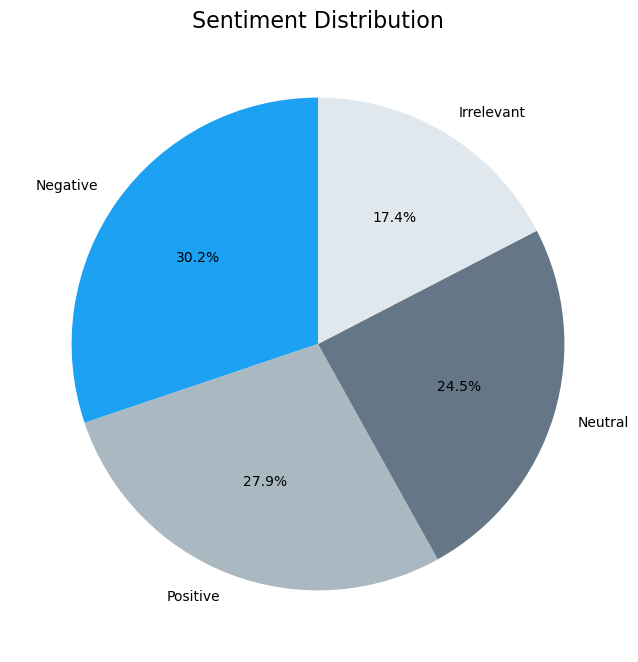

In [14]:
sentiment_counts = df['sentiment'].value_counts()
twitter_colors = ['#1DA1F2', '#AAB8C2', '#657786', '#E1E8ED']
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90, colors=twitter_colors)
plt.title('Sentiment Distribution', fontsize=16)
plt.show()


In [16]:
df['entity'].unique()

array(['Borderlands', 'CallOfDutyBlackopsColdWar', 'Amazon', 'Overwatch',
       'Xbox(Xseries)', 'NBA2K', 'Dota2', 'PlayStation5(PS5)',
       'WorldOfCraft', 'CS-GO', 'Google', 'AssassinsCreed', 'ApexLegends',
       'LeagueOfLegends', 'Fortnite', 'Microsoft', 'Hearthstone',
       'Battlefield', 'PlayerUnknownsBattlegrounds(PUBG)', 'Verizon',
       'HomeDepot', 'FIFA', 'RedDeadRedemption(RDR)', 'CallOfDuty',
       'TomClancysRainbowSix', 'Facebook', 'GrandTheftAuto(GTA)',
       'MaddenNFL', 'johnson&johnson', 'Cyberpunk2077',
       'TomClancysGhostRecon', 'Nvidia'], dtype=object)

In [18]:
df['entity'].nunique()

32

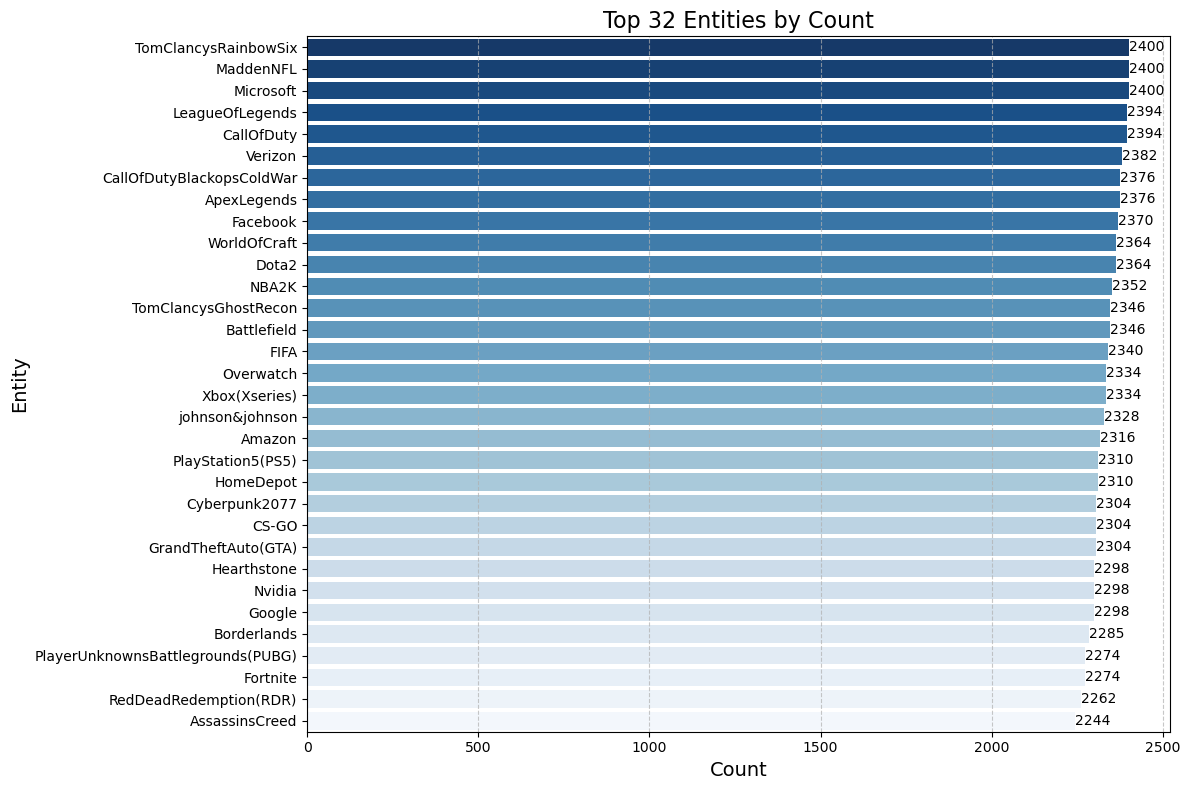

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
top_32_entities = df['entity'].value_counts().nlargest(32)
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x=top_32_entities.values, y=top_32_entities.index, palette="Blues_r")
plt.title('Top 32 Entities by Count', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Entity', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
for index, value in enumerate(top_32_entities.values):
    plt.text(value, index, str(value), va='center')
plt.tight_layout()
plt.show()


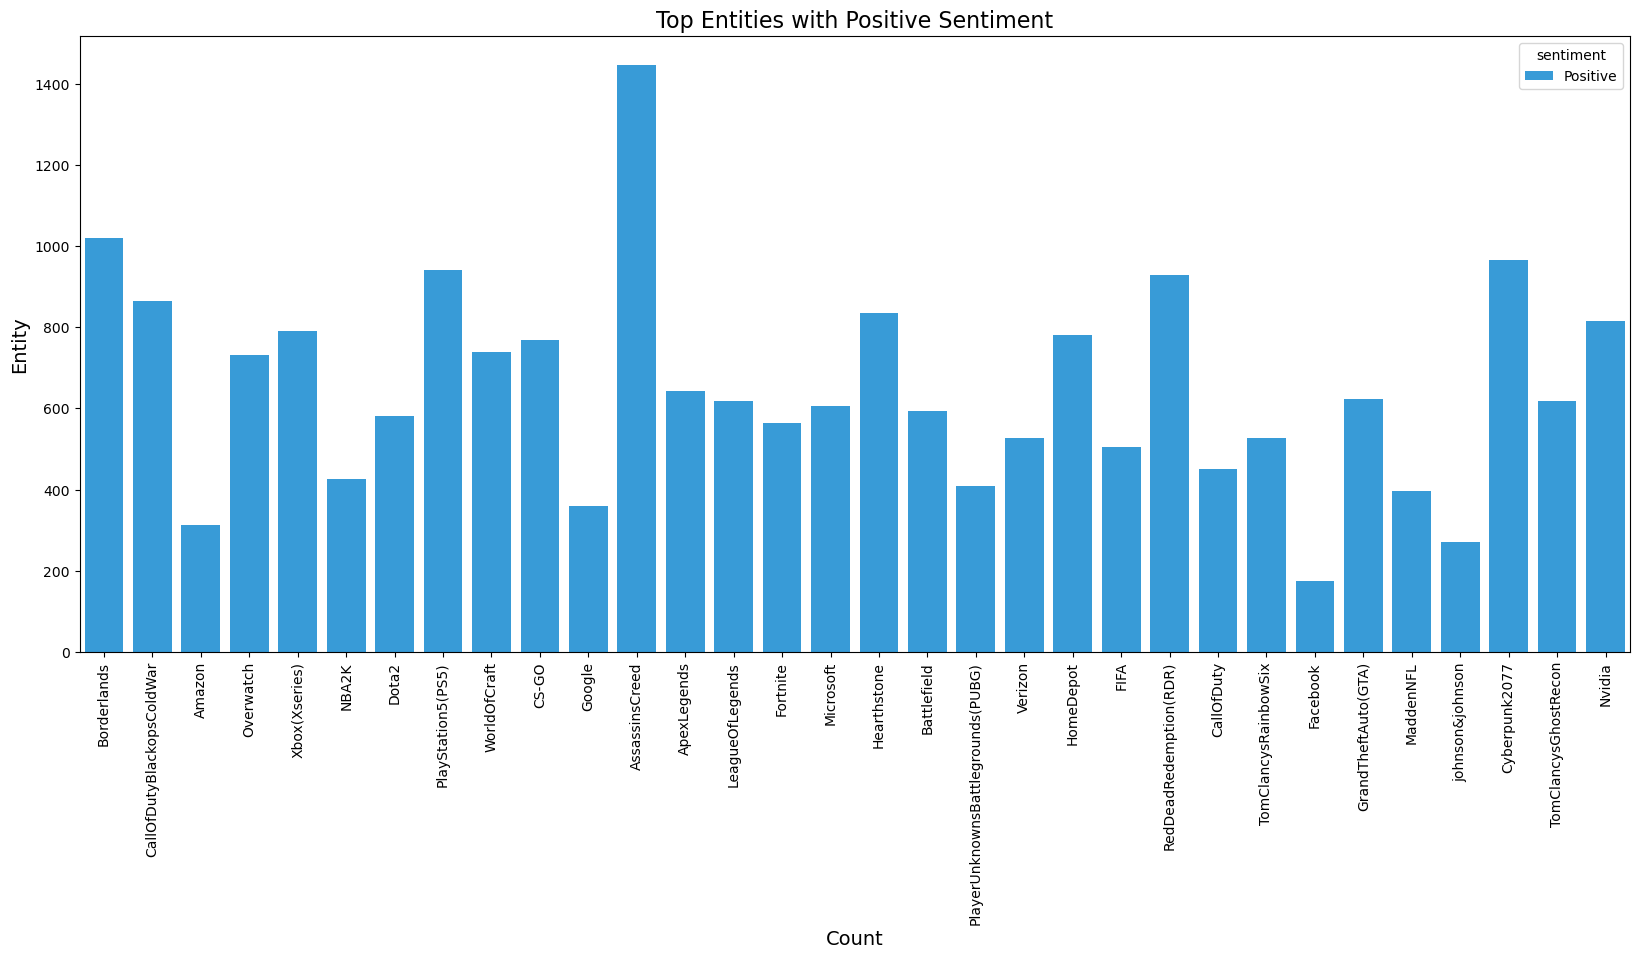

In [42]:
positive_sentiment_df = df[df['sentiment'] == 'Positive']
plt.figure(figsize=(20,8))
twitter_colors = ['#1DA1F2', '#AAB8C2', '#657786', '#E1E8ED']
sns.countplot(x="entity",hue="sentiment",data=positive_sentiment_df,palette=twitter_colors)
plt.title('Top Entities with Positive Sentiment', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Entity', fontsize=14)
plt.xticks(rotation=90)
plt.show()

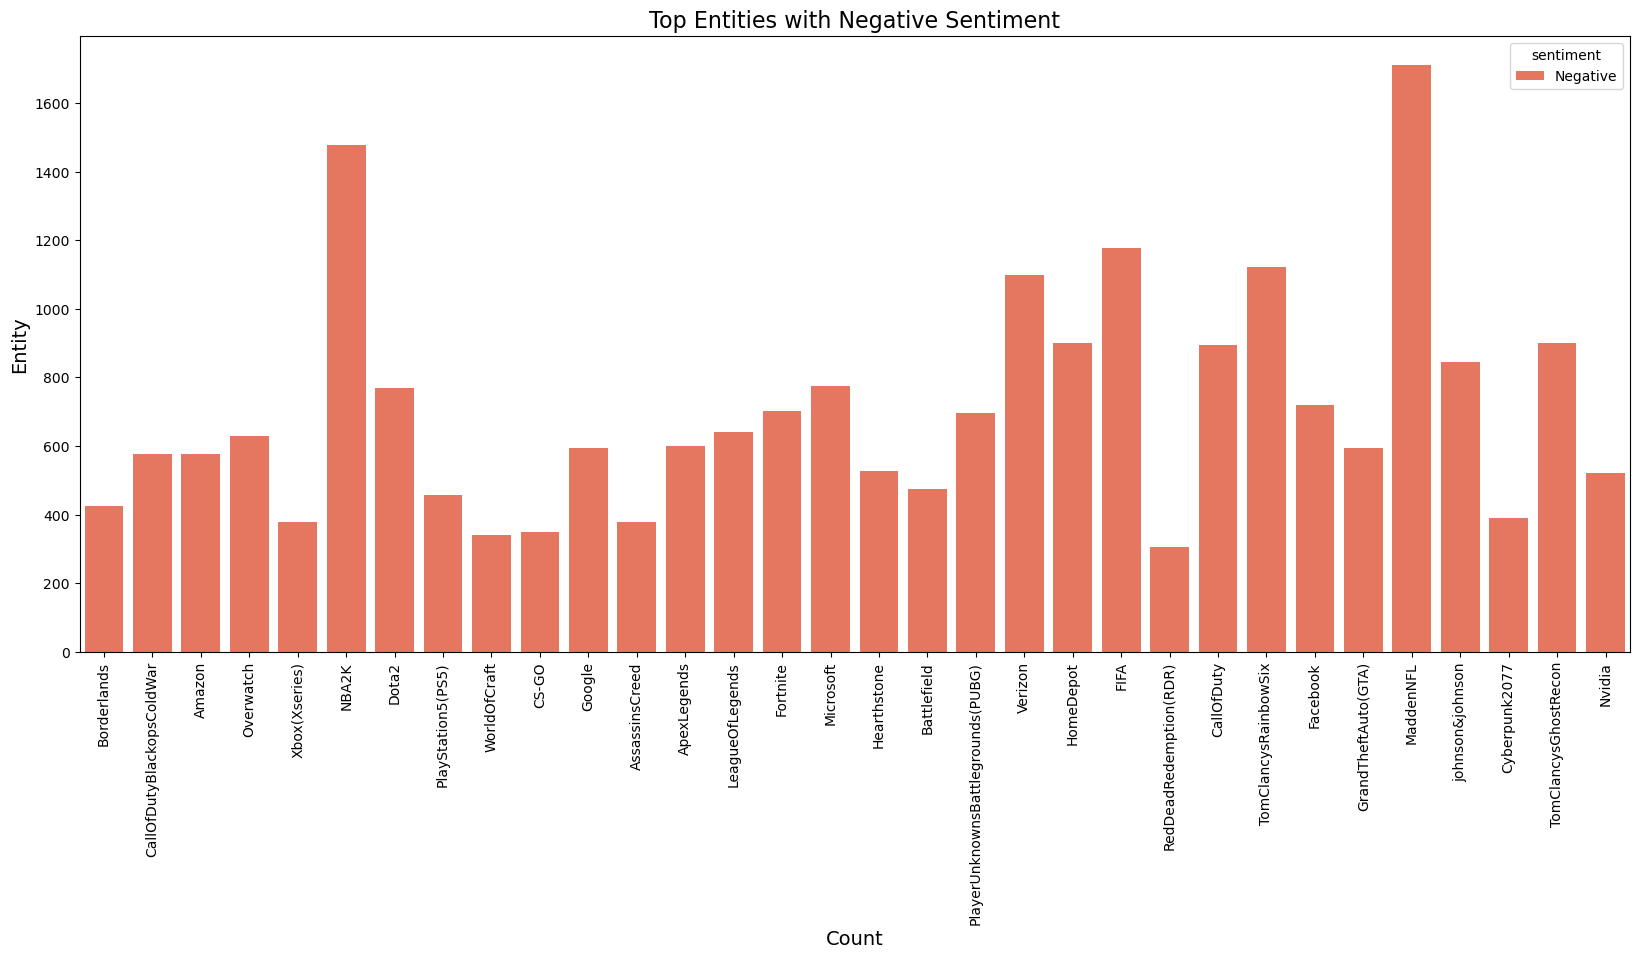

In [48]:
positive_sentiment_df = df[df['sentiment'] == 'Negative']
plt.figure(figsize=(20,8))
sns.countplot(x="entity",hue="sentiment",data=positive_sentiment_df,palette='Reds')
plt.title('Top Entities with Negative Sentiment', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Entity', fontsize=14)
plt.xticks(rotation=90)
plt.show()

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [82]:
train_df

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [76]:
val_df

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
994,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [88]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [90]:
train_df = pd.read_csv('twitter_training.csv')
val_df = pd.read_csv('twitter_validation.csv')

In [92]:
X_train = train_df['Borderlands']
y_train = train_df['Positive']
X_val = val_df['Facebook']
y_val = val_df['Irrelevant']

In [94]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_val_tfidf = vectorizer.transform(X_val)

In [96]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

In [98]:
y_pred = model.predict(X_val_tfidf)

In [100]:
accuracy = accuracy_score(y_val, y_pred)
print(f"Top 1 Classification Accuracy: {accuracy * 100:.2f}%")

Top 1 Classification Accuracy: 41.34%


### Top 1 Classification Accuracy: 41.34%
